In [1]:
pip install --upgrade pip

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [14]:
X_train.shape

(381, 30)

In [15]:
N, D = X_train.shape

In [16]:
print(N, D)

381 30


In [17]:
y_train.shape

(381,)

In [18]:
X_train.shape

(381, 30)

In [19]:
X_test.shape

(188, 30)

In [20]:
y_test.shape

(188,)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [25]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.5831 - accuracy: 0.7375 - val_loss: 0.5889 - val_accuracy: 0.7340
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5307 - accuracy: 0.7717 - val_loss: 0.5406 - val_accuracy: 0.7660
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.8163 - val_loss: 0.4990 - val_accuracy: 0.7979
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4490 - accuracy: 0.8373 - val_loss: 0.4650 - val_accuracy: 0.8085
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4172 - accuracy: 0.8478 - val_loss: 0.4358 - val_accuracy: 0.8511
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8714 - val_loss: 0.4108 - val_accuracy: 0.8564
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8845 - val_loss: 0.3891 - val_accuracy: 0.8564
Epoch 8/100


In [26]:
print("Train_Score:", model.evaluate(X_train, y_train))
print("Test_Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9869
Train_Score: [0.08972097933292389, 0.9868766665458679]
6/6 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9734
Test_Score: [0.10215065628290176, 0.9734042286872864]


In [27]:
import matplotlib.pyplot as plt

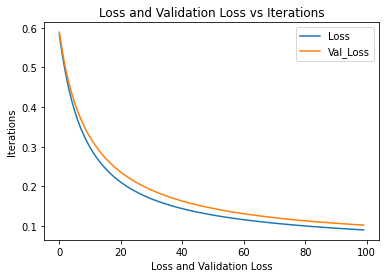

In [28]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label="Val_Loss")
plt.title("Loss and Validation Loss vs Iterations", loc='center')
plt.xlabel("Loss and Validation Loss")
plt.ylabel("Iterations")
plt.legend()

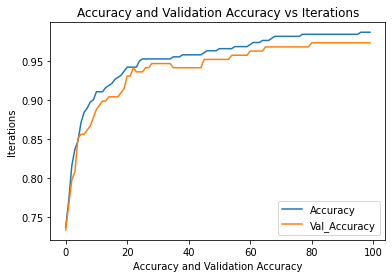

In [29]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label="Val_Accuracy")
plt.title("Accuracy and Validation Accuracy vs Iterations", loc='center')
plt.xlabel("Accuracy and Validation Accuracy")
plt.ylabel("Iterations")
plt.legend()

In [30]:
P = model.predict(X_test)
print(P)

[[9.52446818e-01]
 [9.83851075e-01]
 [8.47505689e-01]
 [2.02573538e-02]
 [9.97640669e-01]
 [2.44027078e-01]
 [6.53836905e-05]
 [8.88243556e-01]
 [9.98420358e-01]
 [9.89531219e-01]
 [1.41519308e-03]
 [4.71811609e-06]
 [9.94449854e-01]
 [9.82910395e-04]
 [9.74298000e-01]
 [8.95465314e-01]
 [5.58262036e-05]
 [4.86122370e-02]
 [9.56047773e-01]
 [9.88089323e-01]
 [7.92975783e-01]
 [9.91848230e-01]
 [9.82374787e-01]
 [5.61636090e-02]
 [1.82056129e-02]
 [6.51982546e-01]
 [8.57354820e-01]
 [9.07532096e-01]
 [9.78531778e-01]
 [5.49908876e-02]
 [9.86025751e-01]
 [3.74322802e-01]
 [9.54096138e-01]
 [8.40636611e-01]
 [9.99891937e-01]
 [5.63605189e-01]
 [5.07703424e-02]
 [6.93350673e-01]
 [8.64336669e-01]
 [9.99338865e-01]
 [9.98811126e-01]
 [9.29382086e-01]
 [9.98224616e-01]
 [9.93149757e-01]
 [9.90474284e-01]
 [9.99884367e-01]
 [9.98154759e-01]
 [9.92793560e-01]
 [9.99532342e-01]
 [9.97088671e-01]
 [2.31304682e-08]
 [9.98811007e-01]
 [3.50472748e-01]
 [9.75735903e-01]
 [4.74958807e-01]
 [9.981297

In [51]:
import numpy as np
# Round array items to a default of 0 decimal points
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.]


In [52]:
print("Manually Calculated Accuracy=", np.mean(P == y_test))

Manually Calculated Accuracy= 0.973404255319149


In [53]:
print("Evaluated Accuracy=", model.evaluate(X_test, y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9734
Evaluated Accuracy= [0.10215065628290176, 0.9734042286872864]


In [54]:
# Save model for sharing with Client
model.save('Patient_Diagnosis_Of_Breast_Tissue_Prediction_Model.h5')

In [55]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Aug  1 03:47 Patient_Diagnosis_Of_Breast_Tissue_Prediction_Model.h5
drwxr-xr-x 1 root root 4.0K Jul 30 16:30 sample_data


In [56]:
model = tf.keras.models.load_model("Patient_Diagnosis_Of_Breast_Tissue_Prediction_Model.h5")

In [57]:
print(model.layers)

In [58]:
# Validate saved model (Clientside)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9734


[0.10215065628290176, 0.9734042286872864]

In [50]:
# Download model from Google Colab
from google.colab import files
files.download("Patient_Diagnosis_Of_Breast_Tissue_Prediction_Model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>